**Title of the Project: "Diabetes Patients"**

**Source:** The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

**Objective:** The primary objective of this dataset is to predict whether a patient has diabetes based on certain diagnostic measurements.

**Data Constraints:**
All patients in this dataset are females. They are at least 21 years old. They belong to the Pima Indian heritage. Features (Independent Variables):

**Pregnancies:** Number of times pregnant Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test BloodPressure: Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm) Insulin: 2-Hour serum insulin (mu U/ml) BMI: Body mass index (weight in kg/(height in m)^2) DiabetesPedigreeFunction: Diabetes pedigree function Age: Age in years Target Variable (Dependent Variable):

**Outcome:** Binary variable (0 or 1) indicating whether the patient has diabetes (1) or not (0).


In [78]:
# imported neccessary libraries for preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlalchemy as sl
warnings.filterwarnings('ignore')
%matplotlib inline

In [79]:
df=pd.read_csv('/content/diabetes.csv')

In [80]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [83]:
#Analyzing the summary of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**summary:** On an average a person had 3 Pregnancies.

The **average glucose level** of a person is 120 which is just above the normal level of 70-110.
The **Maximum glucose level** goes upto 199.

The **average Blood Pressure** of a person is 69 which is below than normal level of 80.


50% of the people had **skin thickness** of 23mm.

The **average Insulin** level of a person is 79 which is beyond the optimum level of 2 to 20 mlU/mL.

 The **average age** of a person from this data is 33 and the **maximum age **is 81.

In [84]:
# checking the zeros in each columns and converting it into nulls.
for col in df.columns[:-1]:
    print(f'{col}: {(df[col]==0).sum()}')
    df[col]=np.where(df[col]==0,np.nan,df[col])

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [85]:
# checking the number of missing values in each columns
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# **Exploratory Data Analysis**

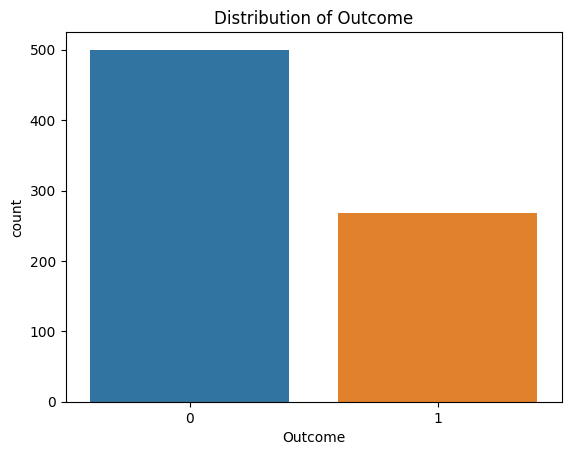

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of the target variable 'Outcome'
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()

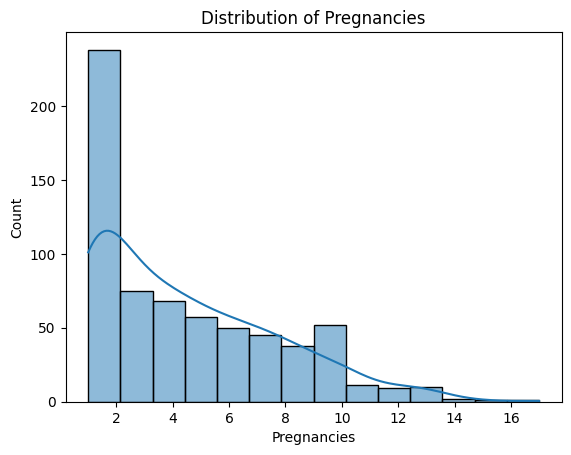

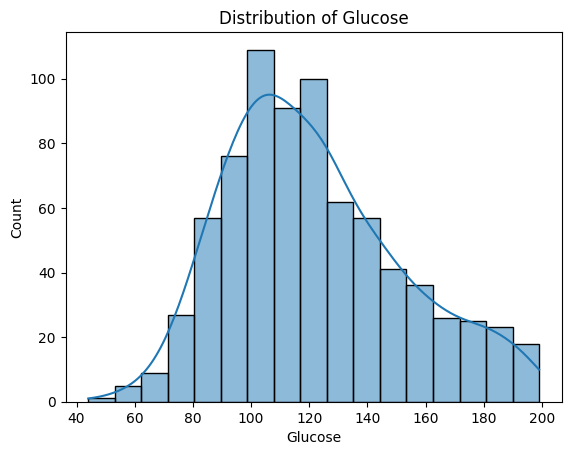

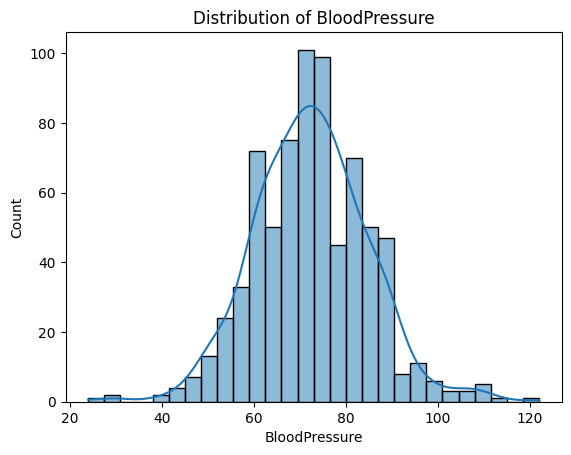

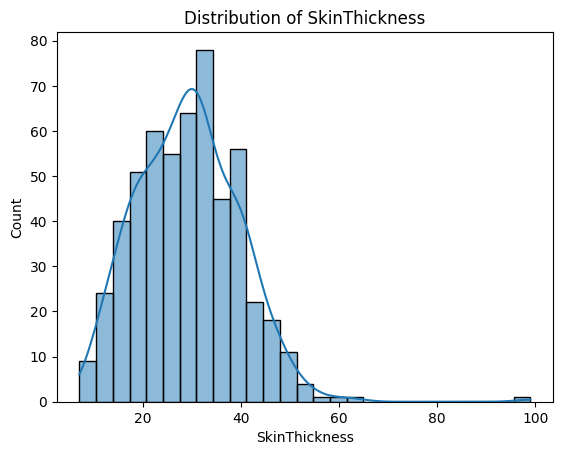

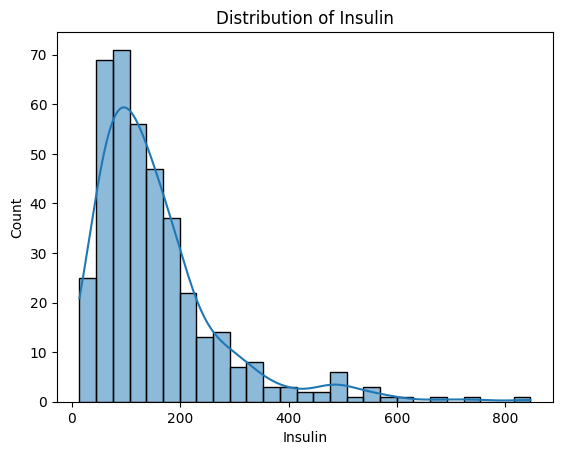

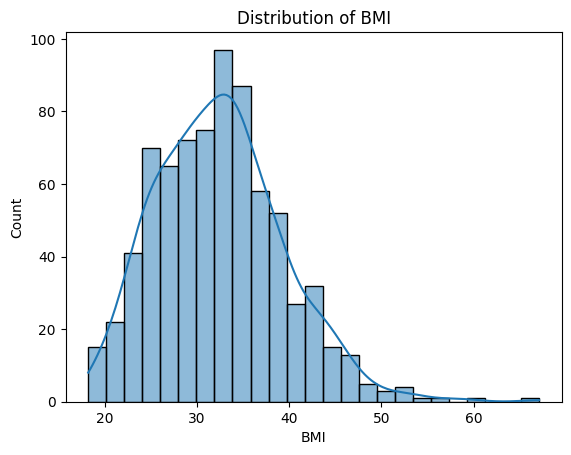

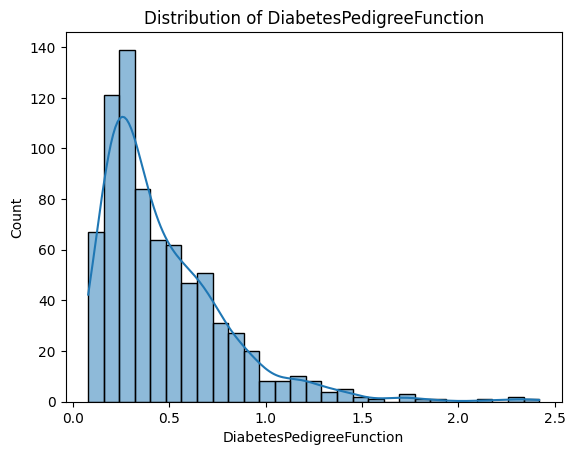

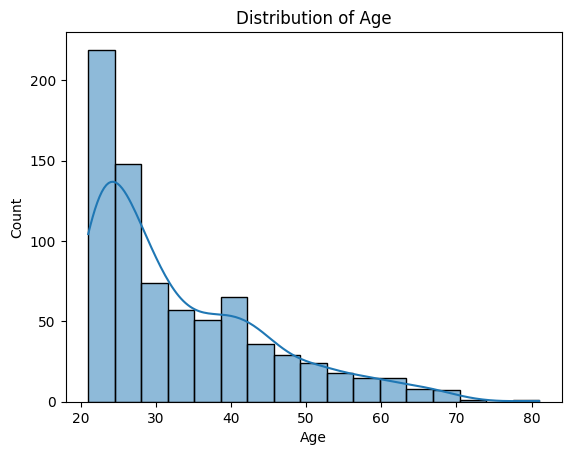

In [87]:
# Visualize feature distributions
for col in df.columns[:-1]:  # Exclude the target variable 'Outcome'
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

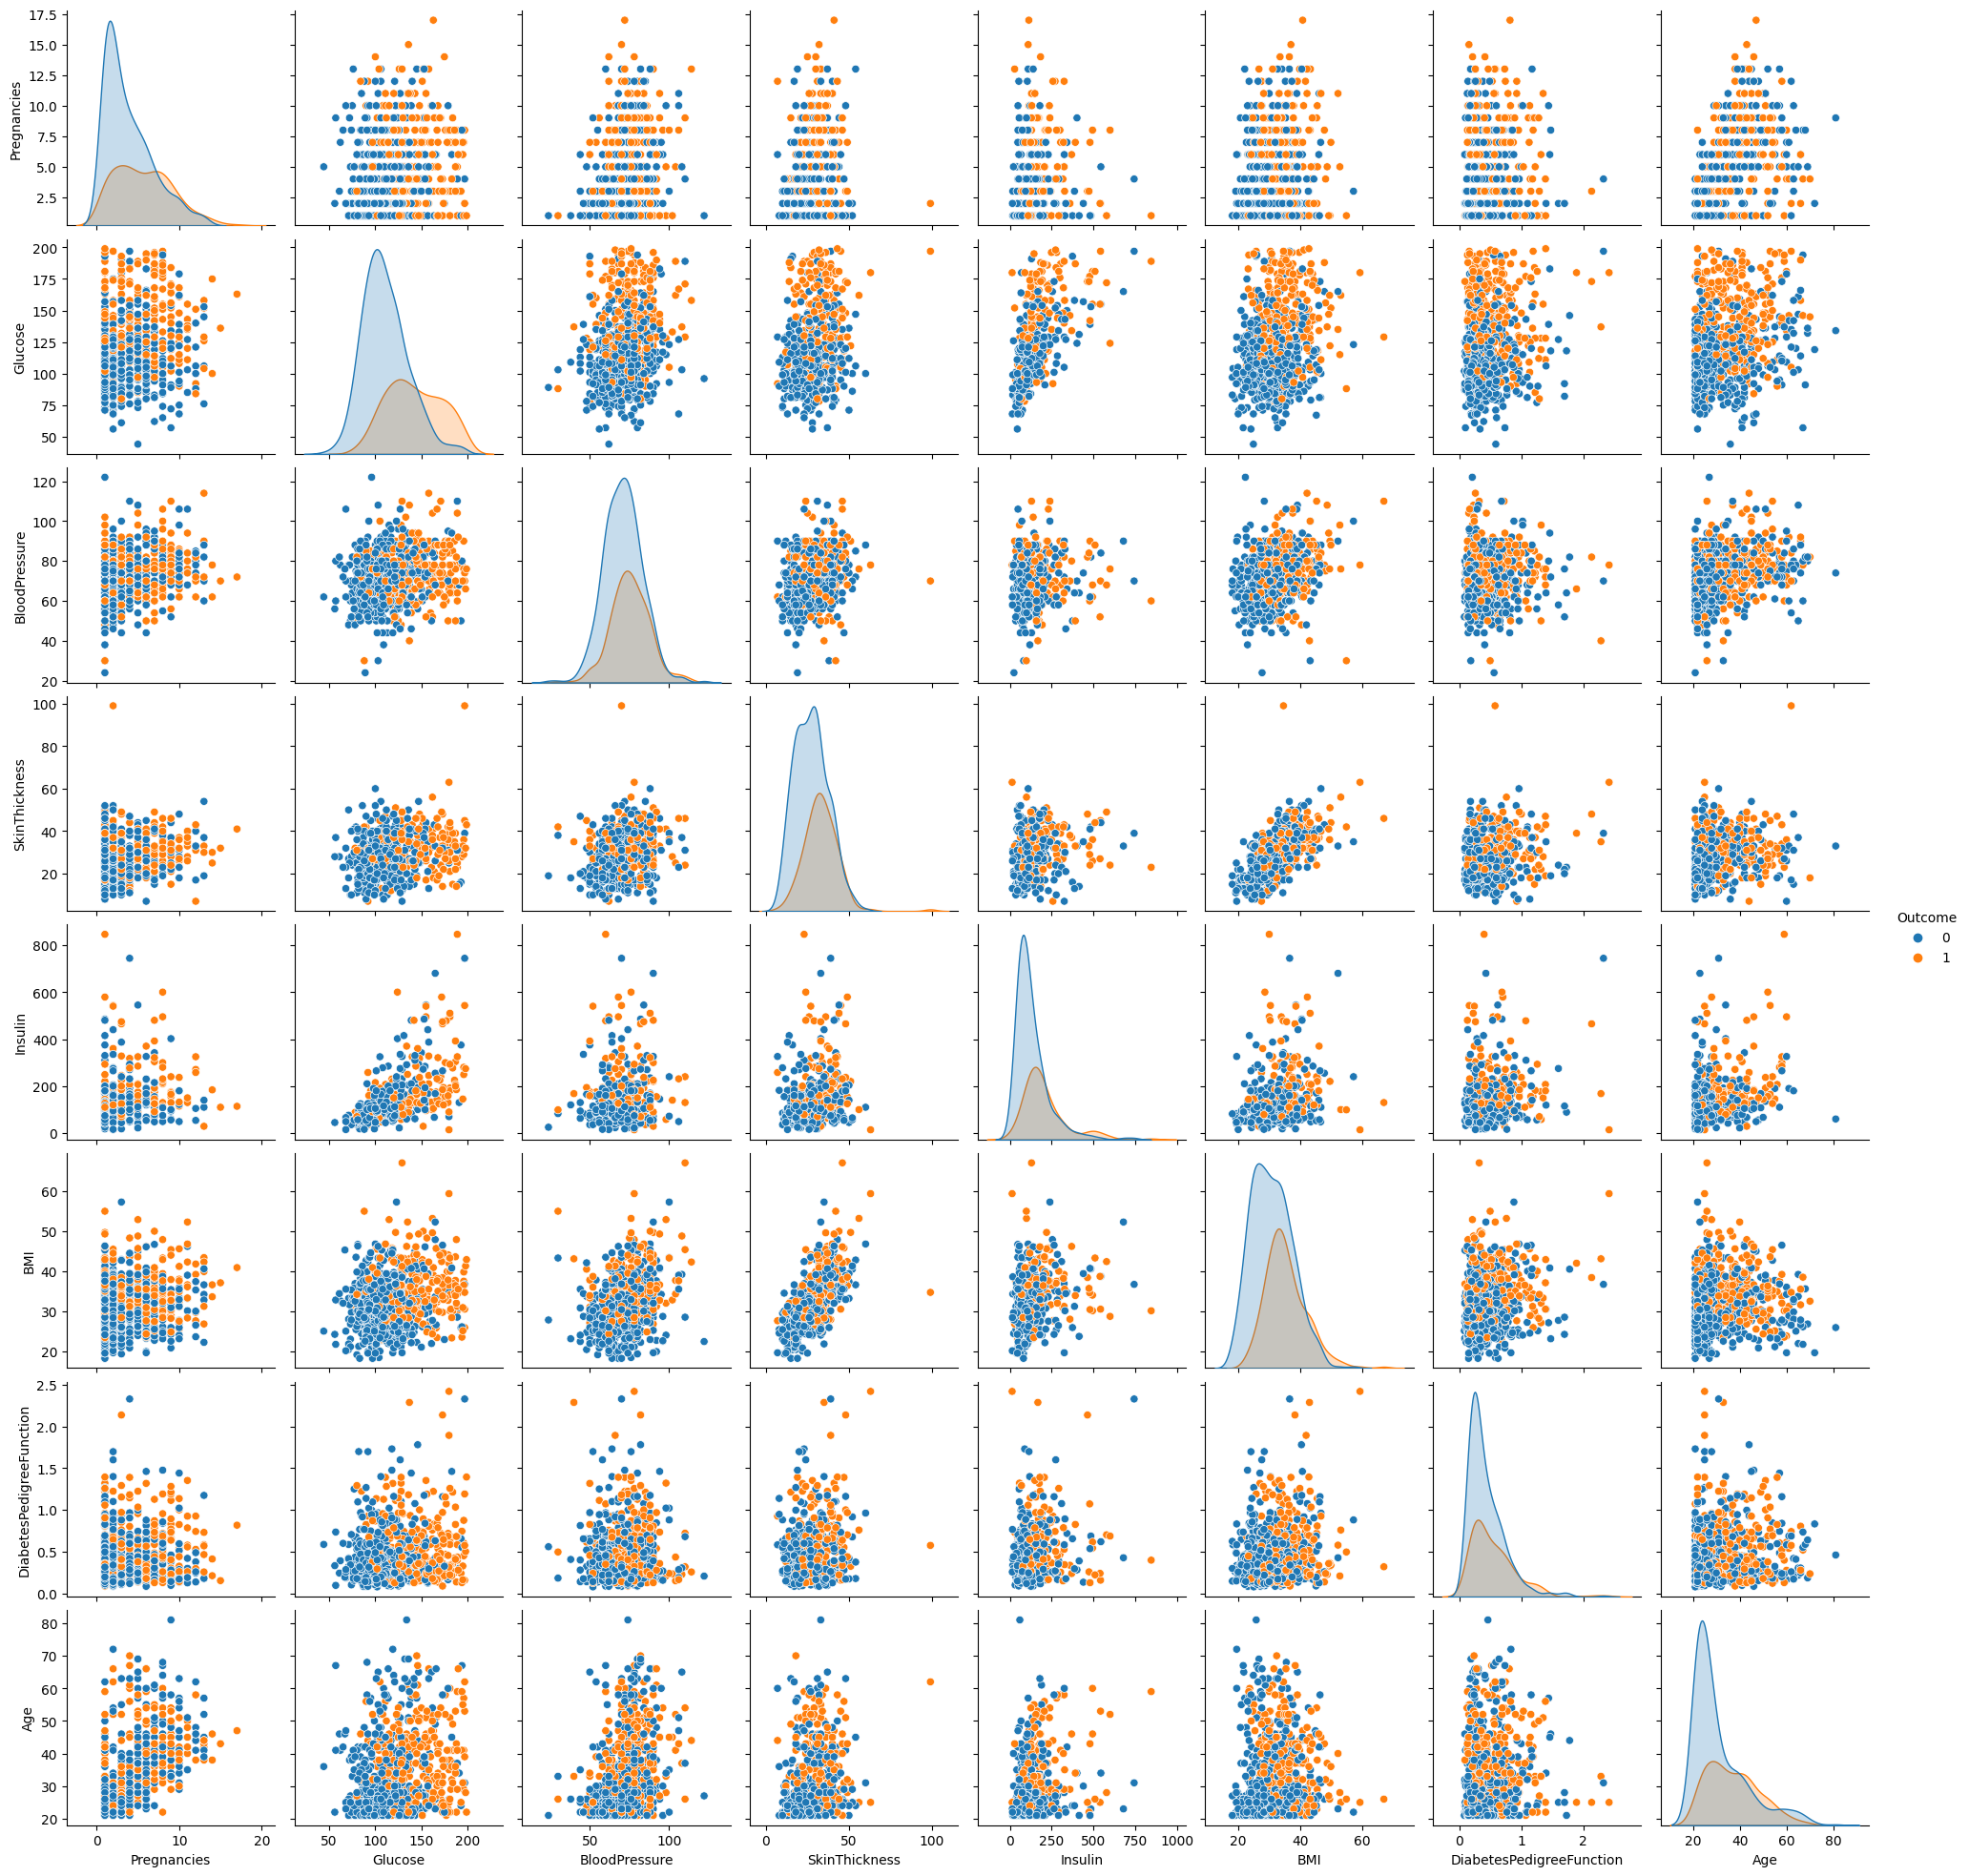

In [88]:
# Pairplot to visualize pairwise relationships between features
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

The countplot shows that the dataset is imbalanced, with more individuals without diabetes (Outcome=0) than those with diabetes (Outcome=1). The feature distribution histograms reveal the shapes of the data for each feature, highlighting potential differences between
diabetic and non-diabetic individuals. The pairplot provides a visual overview of the relationships between features, helping to identify patterns and potential correlations between variables. glucose,Blood pressure ,skinthickness and BMI follows normal distribution. distribution of pregancies ,insulin ,DPF,age features are right skewed.

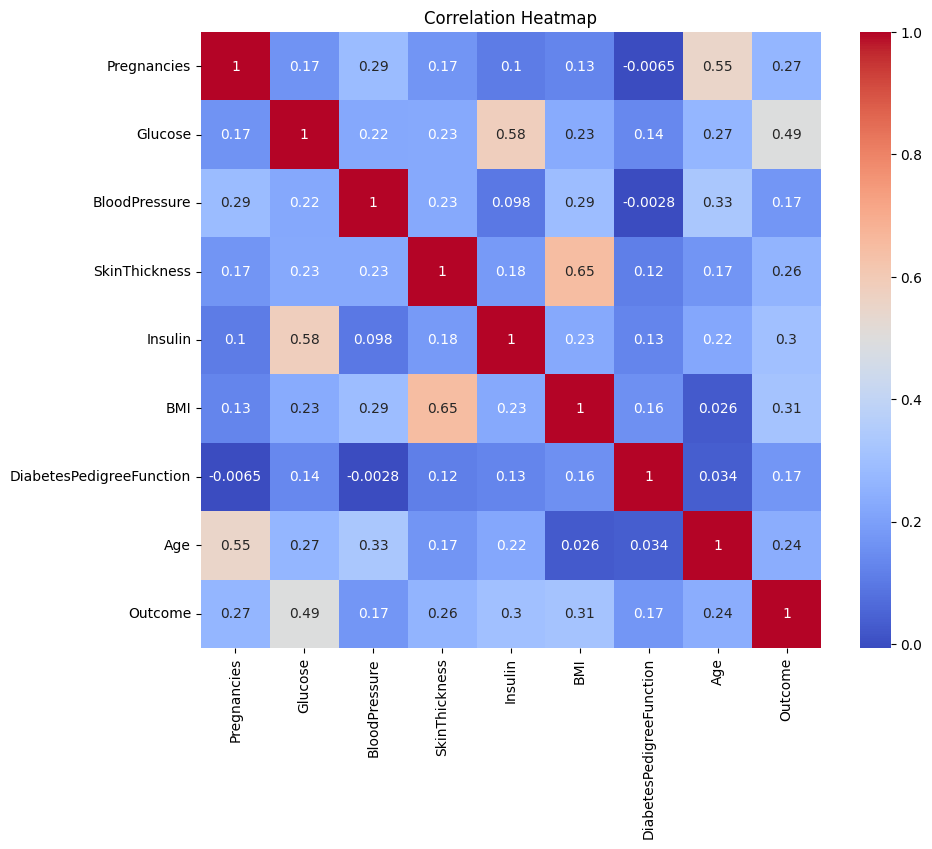

In [89]:
# Correlation matrix
corr_matrix = df.corr()
# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [90]:
# Correlation of features with the target variable
corr_with_target = corr_matrix['Outcome'].sort_values(ascending=False)
print('Correlation of features with Outcome:')
print(corr_with_target)

Correlation of features with Outcome:
Outcome                     1.000000
Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
Pregnancies                 0.268218
SkinThickness               0.259491
Age                         0.238356
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
Name: Outcome, dtype: float64


None of the feature have strong corelation with either target or other features.Glucose feature has some moderate corelation with target feature(outcome)

# **Box plots to visualize feature distributions**

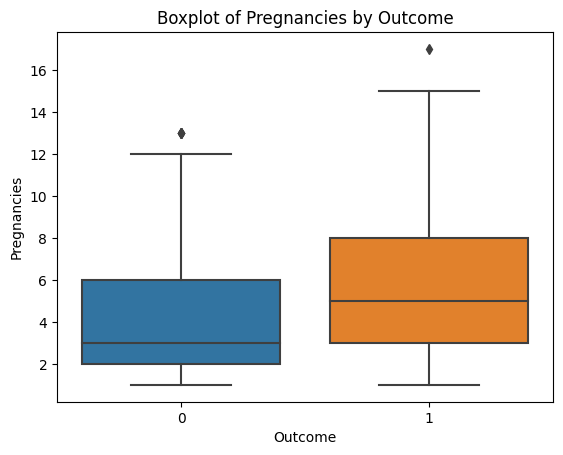

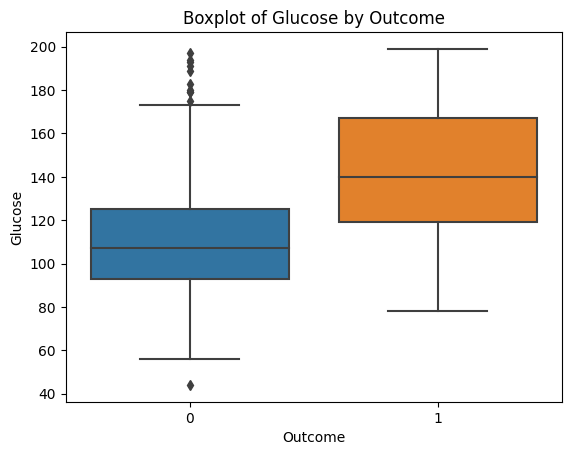

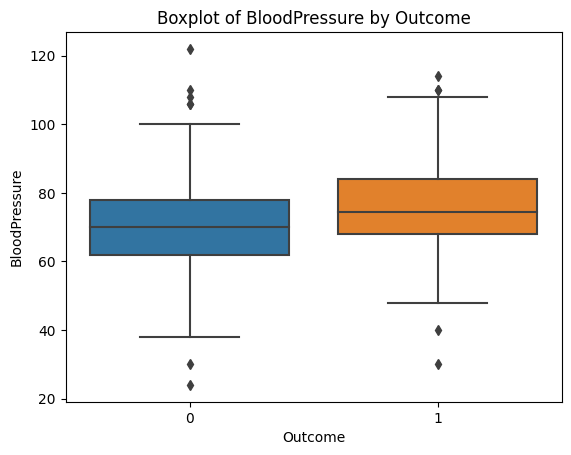

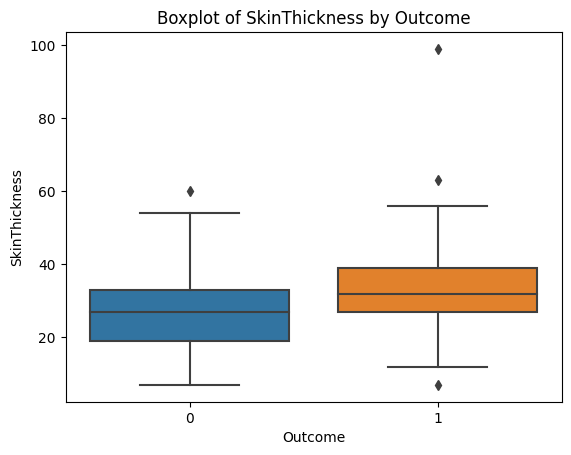

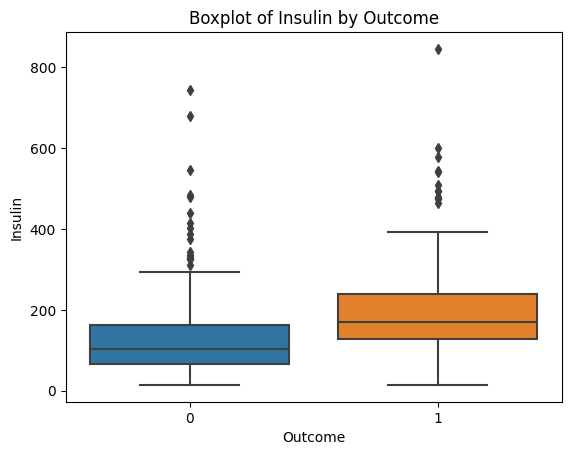

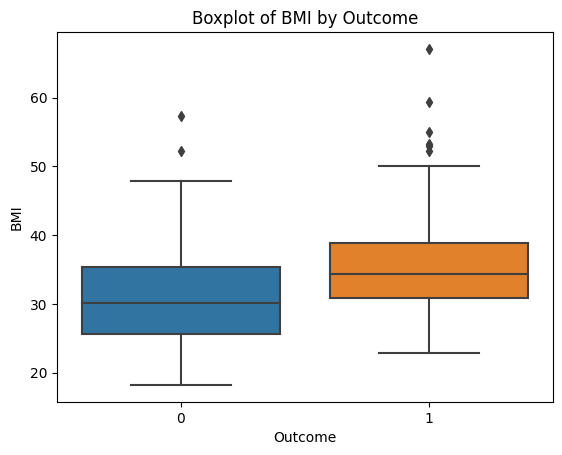

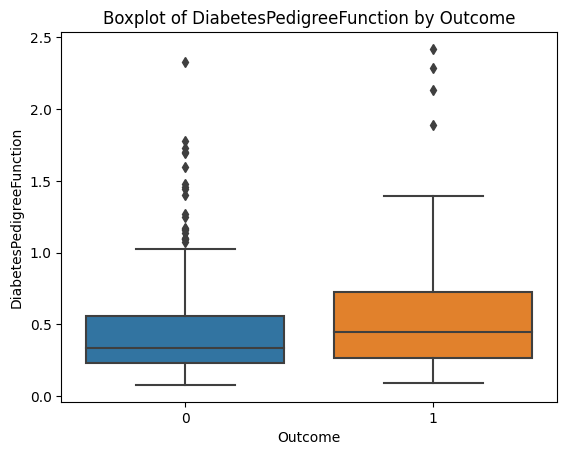

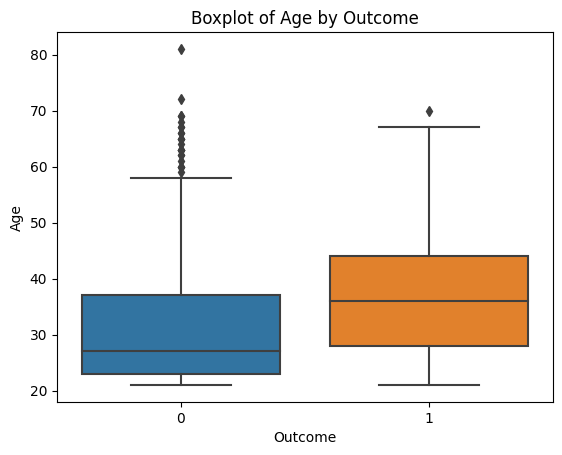

In [91]:
# Box plots to visualize feature distributions
for col in df.columns[:-1]:  # Exclude the target variable 'Outcome'
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Boxplot of {col} by Outcome')
    plt.show()

The majority of individuals in the dataset have fewer pregnancies, with '0' pregnancies being
the most common among both individuals with and without diabetes.
As the number of pregnancies increases, there is a noticeable increase in the number of
individuals with diabetes ('Outcome' = 1).
The proportion of individuals with diabetes ('Outcome' = 1) tends to be higher for those with a
larger number of pregnancies, particularly from 6 pregnancies onwards.
Individuals with '0' pregnancies are more likely to be in the 'No Diabetes' category ('Outcome'
= 0).

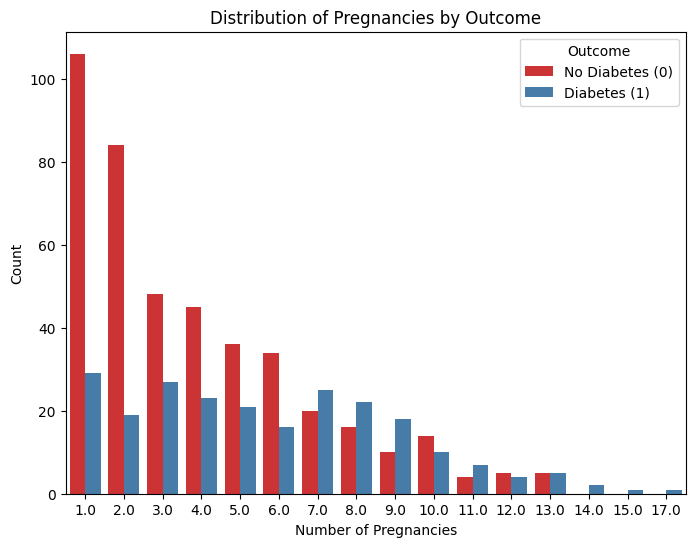

In [92]:
#comparing pregancy column with outcome using countplot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to group 'Pregnancies' by 'Outcome'
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=df, palette='Set1')
plt.title('Distribution of Pregnancies by Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.show()

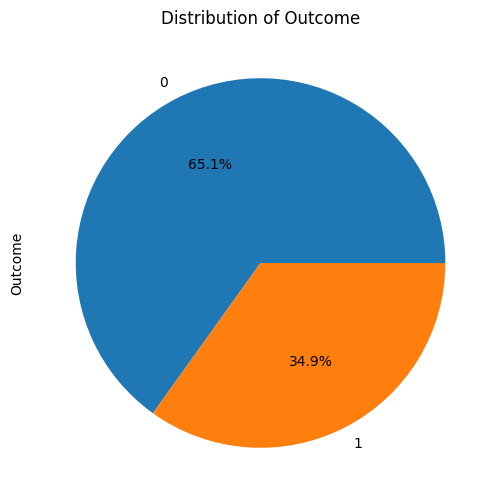

In [93]:
# Pie chart for binary feature 'Outcome'
plt.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Outcome')
plt.show()

the pie chart provides a visual representation of the class distribution for the 'Outcome'
feature, showing that there are more individuals without diabetes(outcome 0) than with
diabetes(outcome 1)in the dataset.

# **Missing values Imputation**

In [94]:
#creating a copy of the original dataframe
df_impute=df.copy(deep=True)



In [95]:
#splitting the dataframe into two, one for diabetes 'No' and one for diabetes 'Yes'
df_impute0=df_impute[df_impute['Outcome']==0]
df_impute1=df_impute[df_impute['Outcome']==1]

In [96]:
df_impute0.shape


(500, 9)

In [97]:
df_impute1.shape

(268, 9)

In [98]:
#filling the missing values in each feature with the median value of both the dataframes
for col in df.columns[:-1]:
    df_impute0[col].fillna(df_impute0[col].median(),inplace=True)
    df_impute1[col].fillna(df_impute1[col].median(),inplace=True)

In [99]:
# combining the two imputed dataframes into one
df_impute=pd.concat([df_impute0,df_impute1]).reset_index()

In [100]:
#checking for null values after imputation for validation purpose
df_impute.isnull().sum()

index                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Outlier Treatment**

In [101]:
#function to cap the outliers in the feature columns
def cap(dataframe,col):
    q1=dataframe[col].quantile(0.25)
    q3=dataframe[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    return dataframe[col].clip(lower,upper)


In [102]:
#capping each columns in the dataframe
for col in df_impute.columns[:-1]:
    df_impute[col]=cap(df_impute,col)
df_impute.drop('index',axis=1,inplace=True)


In [103]:
#Defining the X and Y, Features and target variables respectively
X=df_impute.drop(['Outcome'],axis=1)
y=df_impute['Outcome']


In [104]:
#importing neccesary modules to split the data into train and test and standardize the data.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [105]:
#splitting the data into train and test for training and validation purpose.
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# **Feature Selection**

In [106]:
#importing multiple modules to select most relevant features for prediction
from sklearn.feature_selection import mutual_info_classif,f_classif,SelectKBest

In [107]:
#using mutual info classifier to know the amount information gained from each feature
mic=mutual_info_classif(X_train,Y_train,n_neighbors=4,random_state=33)


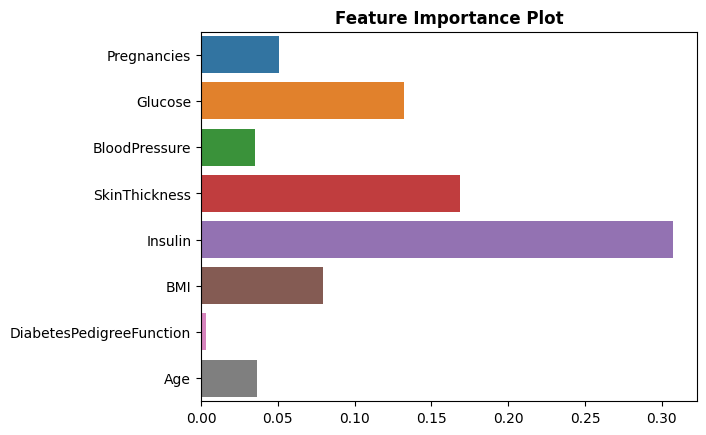

In [108]:
#plotting the feature importance score to select the important features
sns.barplot(y=X_train.columns,x=mic)
plt.title('Feature Importance Plot',weight='bold')
plt.show()

Seems like, Diabetes Pedigree Function has nearly zero mutual information score. It shows
that Genetic factor Indicators have less importance in predicting the diabetes. In order to
concrm the same, we can perform other feature selection methods to cnd the importance of
features.

In [109]:
#calculating p values for each feature
_,p=f_classif(X_train,Y_train)

p

array([4.96473877e-11, 9.40425280e-40, 8.03043731e-06, 1.26636214e-18,
       2.99867823e-36, 5.16317853e-18, 1.80193962e-06, 1.22007754e-09])

All the features have p-value less 0.05 which implies null hypothesis can be rejected and all
the features have some importance in predicting the outcome

In [110]:
rfe=SelectKBest(k=7)
rfe.fit(X_train,Y_train)

SelectKBest(k=7)

In [111]:
rfe.scores_

array([ 44.89787857, 203.59086329,  20.29859575,  83.15822484,
       182.1460154 ,  79.98584578,  23.27472148,  38.1855164 ])

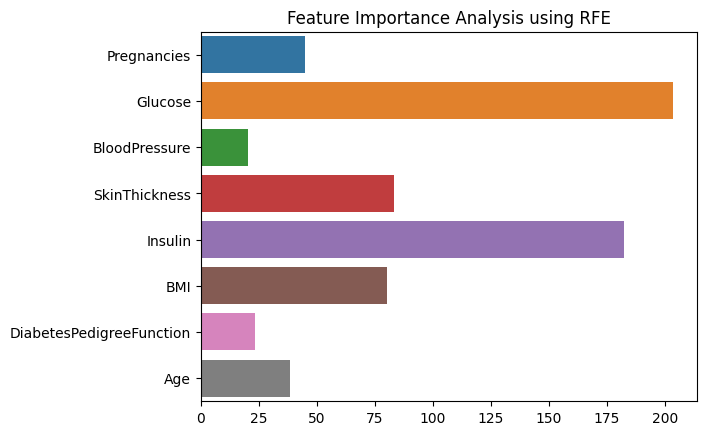

In [112]:
sns.barplot(y=X_train.columns,x=rfe.scores_)
plt.title('Feature Importance Analysis using RFE')
plt.show()

Recursive Feature Elimination method also tells that the Diabetes Pedigree Function have
relatively less importance than other features. Hence, we can drop the DiabetesPedigree
Function from Train and Test data.

In [113]:
#dropping the DPF feature from the train and test data
X_train.drop(columns=['DiabetesPedigreeFunction'],inplace=True)
X_test.drop(columns=['DiabetesPedigreeFunction'],inplace=True)


In [114]:
#importing smote method to balance the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train,Y_train=sm.fit_resample(X_train,Y_train)
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

# **Model Building**

**1)Model1:LogisticRegression**

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [116]:
# Create a logistic regression model instance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Train the model using the training sets
model.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.796875
Confusion Matrix:
 [[107  23]
 [ 16  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       130
           1       0.67      0.74      0.70        62

    accuracy                           0.80       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.80      0.80      0.80       192



**2)MODEL2:Support Vector Machine**

In [117]:
#Importing SVM model
from sklearn import svm
#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred =clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8541666666666666
Confusion Matrix:
 [[110  20]
 [  8  54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       130
           1       0.73      0.87      0.79        62

    accuracy                           0.85       192
   macro avg       0.83      0.86      0.84       192
weighted avg       0.87      0.85      0.86       192



**3)MODEL3:RandomForest**

In [118]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 9,criterion="entropy")
#Train the model using the training sets
classifier.fit(X_train, Y_train)
#Predicting the test set result
Y_pred= classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.84375
Confusion Matrix:
 [[113  17]
 [ 13  49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       130
           1       0.74      0.79      0.77        62

    accuracy                           0.84       192
   macro avg       0.82      0.83      0.82       192
weighted avg       0.85      0.84      0.84       192



**4)MODEL4:GRADIANT BOOSTING**

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create a Gradient Boosting Classifier instance with 100 trees and a fixed random seed
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
#Train the model using the training sets
model.fit(X_train, Y_train)
#Predicting the test set result
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8645833333333334
Confusion Matrix:
 [[119  11]
 [ 15  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       130
           1       0.81      0.76      0.78        62

    accuracy                           0.86       192
   macro avg       0.85      0.84      0.84       192
weighted avg       0.86      0.86      0.86       192

